# Построение графика Gaussian-Gamma KLD

In [1]:
import numpy as np
from scipy import special
import math

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

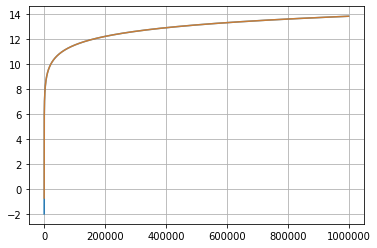

In [2]:
# The exponential exp ψ(x) is approximately x − 1/2 for large x, 
# but gets closer to x at small x, approaching 0 at x = 0.
psi_one_half = -2*np.log(2) - np.euler_gamma
psi = [psi_one_half]
z = [0.5]
for k in range(1000000):
    z_i = z[-1]
    p_i = psi[-1] + 1/z_i
    z.append(z_i + 1)
    psi.append(p_i)

z = np.array(z)
psi = np.array(psi)

plt.plot(z, psi, label='digamma');
plt.plot(z, np.log(z), label='log(x)', alpha=0.75);
plt.grid(True);

-4.905802486464381


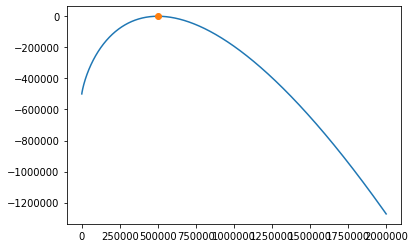

In [3]:
# Максимум член достигается при k = u^2/2
def get_term(u, k):
    p = np.zeros(k.shape)
    mask = k < len(psi)
    p[mask] = psi[k[mask]]
    p[~mask] = np.log(k[~mask])
    v = -0.5*u**2 + 2*k*np.log(u) + np.log(p) - k*np.log(2) - special.loggamma(k + 1)
    return v

k = np.arange(1, 2000000)
u = 1000.0

v = get_term(u, k)
plt.plot(k, v);
plt.plot(u**2/2, 0.0, 'o');
print(max(v))

-6.907586216926575


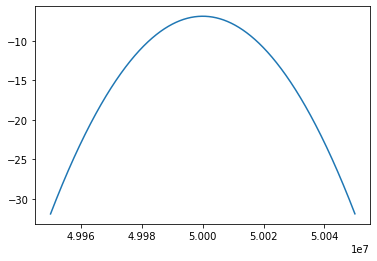

In [4]:
u = 10000.0

k_max = int(0.5*u**2) + 1
k_range = int(5*u)
k_min = max(1, k_max - k_range)
k_max = k_max + k_range

k = np.arange(k_min, k_max+1)
v = get_term(u, k)
# v = np.exp(v)
plt.plot(k, v)
print(max(v))

In [5]:
v_max = np.max(v)
dv = v - v_max
sv = np.sum(np.exp(dv))
sv *= np.exp(v_max)

print(sv)

17.727535423306183


In [6]:
def get_kld_const(alpha, beta):
    return (-0.5*np.log(math.pi*math.exp(1)/2) + special.loggamma(alpha) - alpha*np.log(beta) 
            + 0.5*(1-alpha)*np.log(2))

def get_kld(alpha, beta, sigma, u):
    c0 = get_kld_const(alpha, beta)
    c1 = -alpha*np.log(sigma)
    c2 = np.exp(-0.5*u**2)*(np.sqrt(2/math.pi)*beta*sigma - 0.5*(1-alpha)*(2.0*np.log(2)+np.euler_gamma))
    c3 = beta*sigma*u*special.erf(u/np.sqrt(2))
    return c1 + c2 + c3

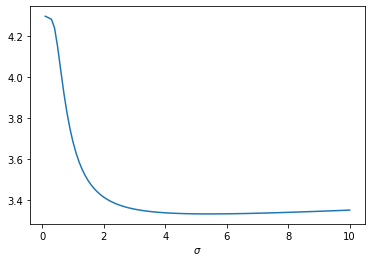

In [7]:
alpha = 0.01
beta = 0.01
mu = 1.0
sigma = np.linspace(0.1, 10, 100)

u = mu / sigma
v = get_kld_const(alpha, beta) + get_kld(alpha, beta, sigma, u)

plt.plot(sigma, v);
plt.xlabel('$\sigma$');

In [8]:
math.exp(1)

2.718281828459045